Success: '../1900_2021_DISASTERS.xlsx - emdat data.csv' loaded.
Found 5245 available rows for analysis.


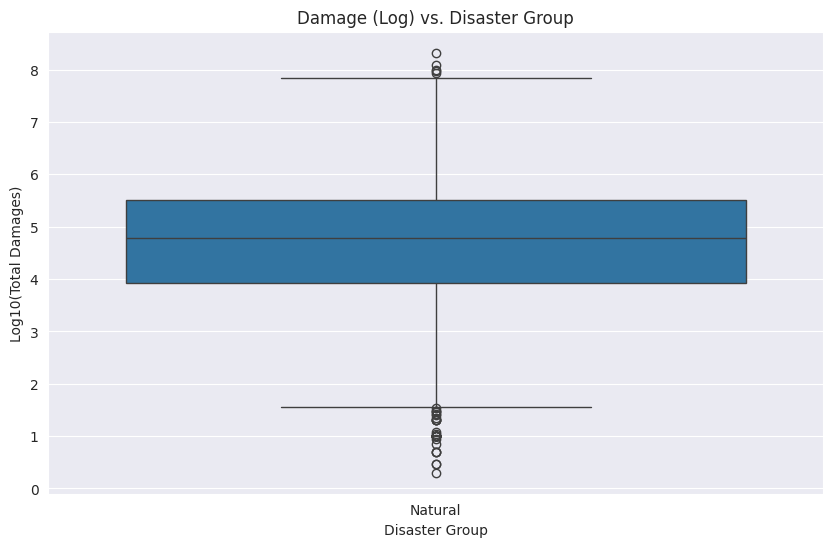

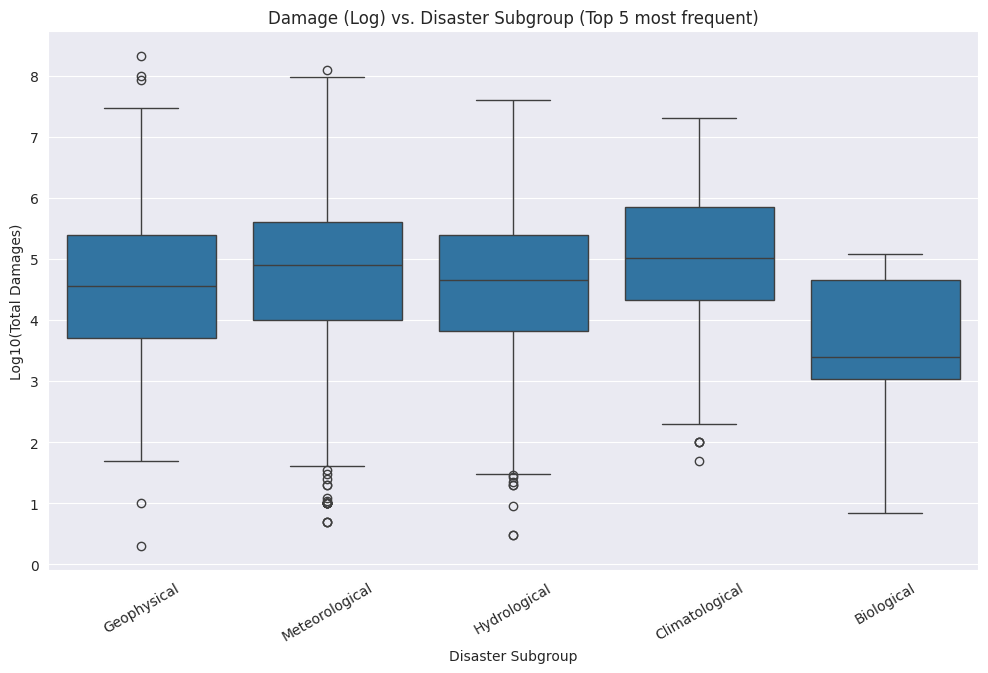

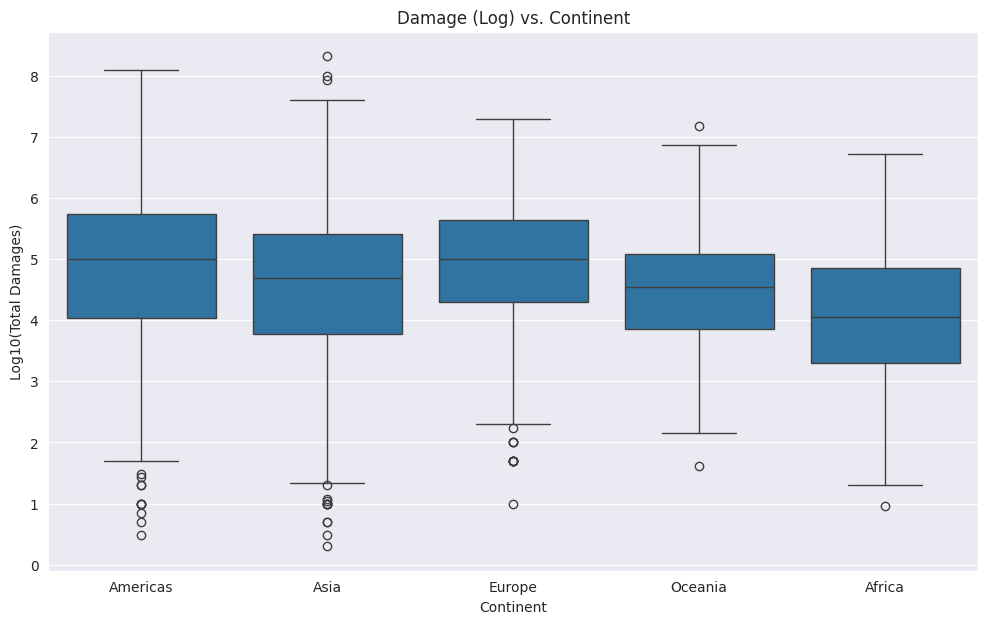

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Data Loading (Corrected) ---

# Assuming the CSV file is one directory up from the 'notebooks' folder
file_path = "../1900_2021_DISASTERS.xlsx - emdat data.csv"
target_col = "Total Damages ('000 US$)"

try:
    df = pd.read_csv(file_path)
    print(f"Success: '{file_path}' loaded.")
except FileNotFoundError:
    print(f"ERROR: File not found at '{file_path}'.")
    print("Please manually check your file path.")
    # 'Clean up' error handling: catch the error and stop the program.
    raise

# --- Data Preparation (From Step 1) ---
# Select only the target (Total Damages) and features of interest
# and keep rows where Total Damages is not NaN
features_to_analyze = ['Disaster Group', 'Disaster Subgroup', 'Continent']
analysis_df = df[[target_col] + features_to_analyze].copy()
analysis_df = analysis_df.dropna(subset=[target_col])

# Transform the target variable to Log (for values greater than 0)
# .replace(0, 1e-6) -> Add a very small number to prevent taking the log of 0
analysis_df['Log_Total_Damages'] = np.log10(analysis_df[target_col].replace(0, 1e-6))

print(f"Found {len(analysis_df)} available rows for analysis.")


# --- Visualization ---

# Feature 1: Disaster Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=analysis_df, x='Disaster Group', y='Log_Total_Damages')
plt.title("Damage (Log) vs. Disaster Group")
plt.ylabel("Log10(Total Damages)")
plt.xlabel("Disaster Group")
plt.show()

# Feature 2: Disaster Subgroup
# Take the 5 most frequent ones
top_subgroups = analysis_df['Disaster Subgroup'].value_counts().nlargest(5).index
df_top_subgroups = analysis_df[analysis_df['Disaster Subgroup'].isin(top_subgroups)]

plt.figure(figsize=(12, 7))
sns.boxplot(data=df_top_subgroups, x='Disaster Subgroup', y='Log_Total_Damages')
plt.title("Damage (Log) vs. Disaster Subgroup (Top 5 most frequent)")
plt.ylabel("Log10(Total Damages)")
plt.xlabel("Disaster Subgroup")
plt.xticks(rotation=30) # Rotate the labels
plt.show()

# Feature 3: Continent
plt.figure(figsize=(12, 7))
sns.boxplot(data=analysis_df, x='Continent', y='Log_Total_Damages')
plt.title("Damage (Log) vs. Continent")
plt.ylabel("Log10(Total Damages)")
plt.xlabel("Continent")
plt.show()